### Setting up imports

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3

Load in the data

In [126]:
data = pd.read_csv("data/batting_season_summary.csv")

# Extract relevant columns
columns_of_interest = [
    "age",
    "PA",
    "AB",
    "H",
    "2B",
    "3B",
    "HR",
    "BB",
    "SO",
    "BA",
    "OBP",
    "SLG",
    "OPS",
    "Year",
]

## remove pitchers from the dataframe
data = data.drop(data[data["pos"] == "P"].index, axis=0)

relevant_data = data[columns_of_interest]

In [127]:

# Get unique years
years = relevant_data["Year"].unique()

# Calculate mean statistics for each year
mean_stats_by_year = {}
for year in years:
    mean_stats_by_year[year] = relevant_data[relevant_data["Year"] == year].mean()

# Convert dictionary to DataFrame
mean_stats_by_year_df = pd.DataFrame(mean_stats_by_year).transpose()




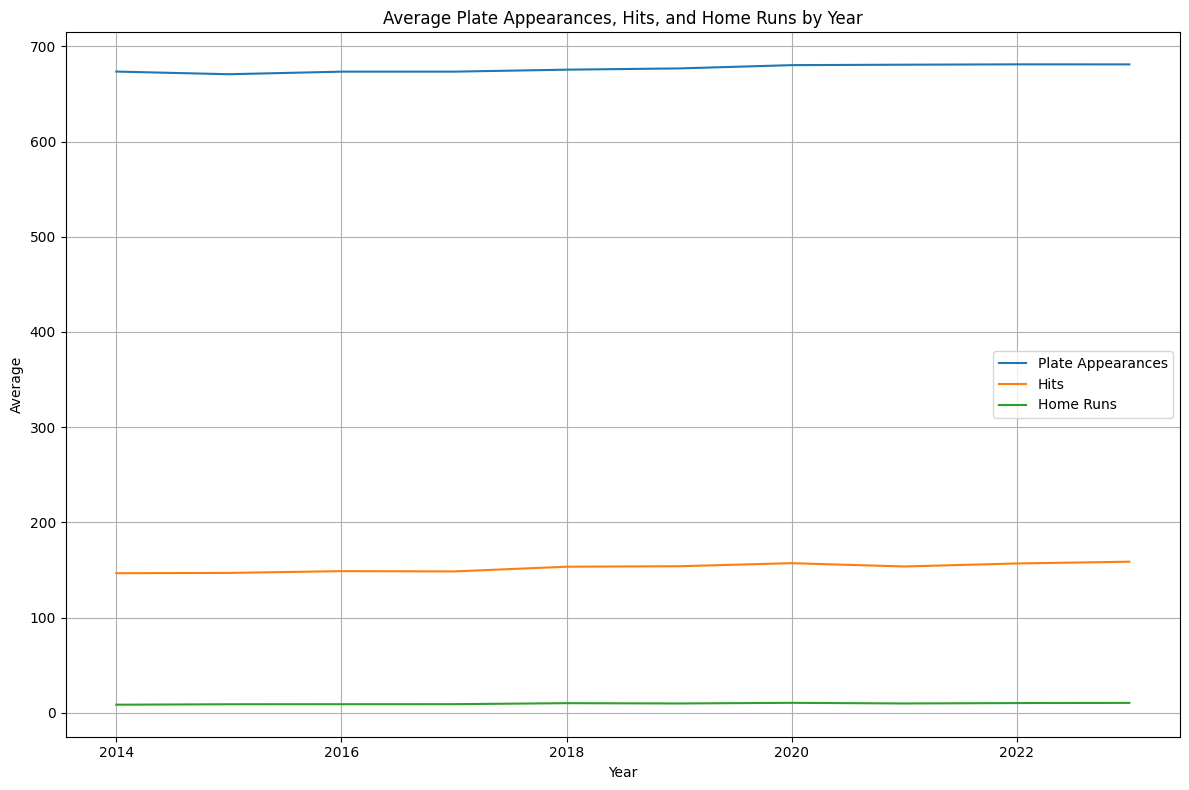

In [128]:
# Plotting
plt.figure(figsize=(12, 8))

plt.plot(
    mean_stats_by_year_df.index, mean_stats_by_year_df["PA"], label="Plate Appearances"
)
plt.plot(mean_stats_by_year_df.index, mean_stats_by_year_df["H"], label="Hits")
plt.plot(mean_stats_by_year_df.index, mean_stats_by_year_df["HR"], label="Home Runs")

plt.title("Average Plate Appearances, Hits, and Home Runs by Year")
plt.xlabel("Year")
plt.ylabel("Average")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [129]:
# Extract relevant columns
columns_of_interest = [
    "age",
    "PA",
    "AB",
    "H",
    "2B",
    "3B",
    "HR",
    "BB",
    "SO",
    "BA",
    "OBP",
    "SLG",
    "OPS",
]
relevant_data = data[columns_of_interest]

# Convert relevant columns to numeric types
relevant_data = relevant_data.apply(pd.to_numeric, errors="coerce")

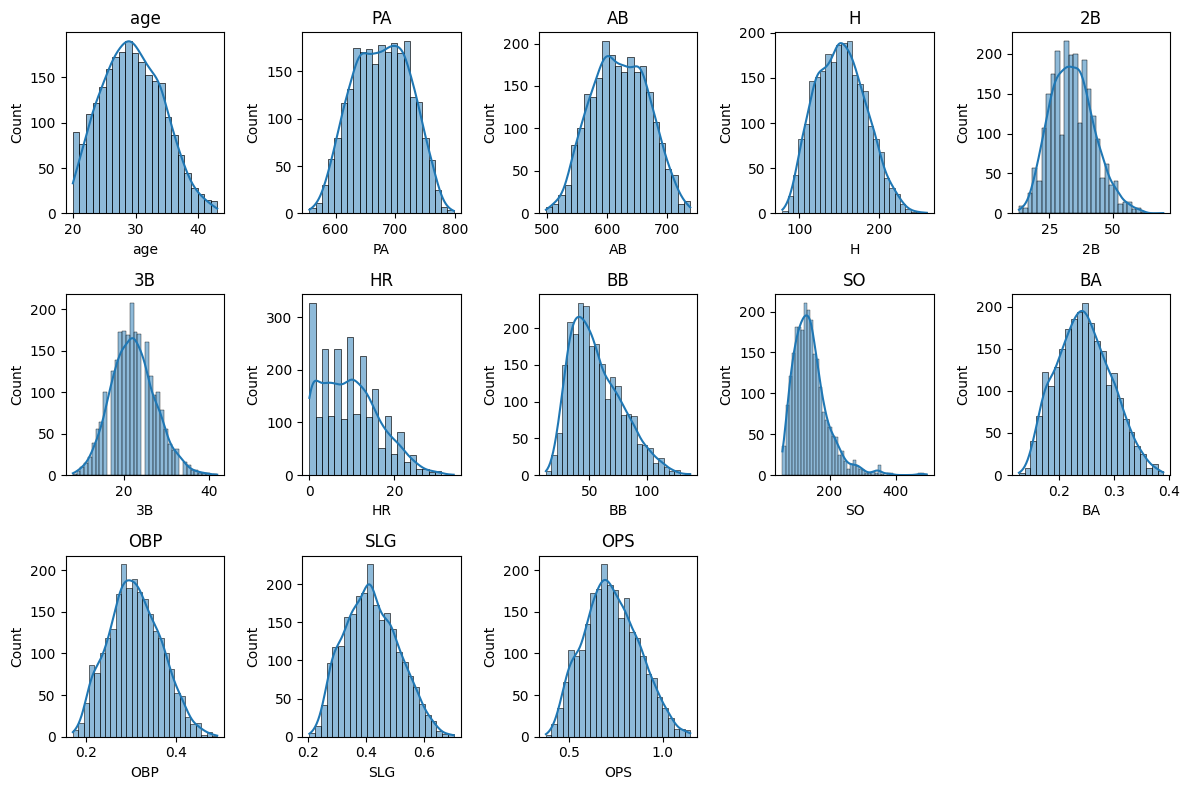

In [130]:
# Histograms and Density Plots
fig = plt.figure(figsize=(12, 8))
for i, column in enumerate(relevant_data.columns):
    plt.subplot(3, 5, i + 1)
    sns.histplot(relevant_data[column], kde=True)
    plt.title(column)
plt.tight_layout()

html_str = mpld3.fig_to_html(fig)
Html_file = open("index.html", "w")
Html_file.write(html_str)
Html_file.close()

plt.show()

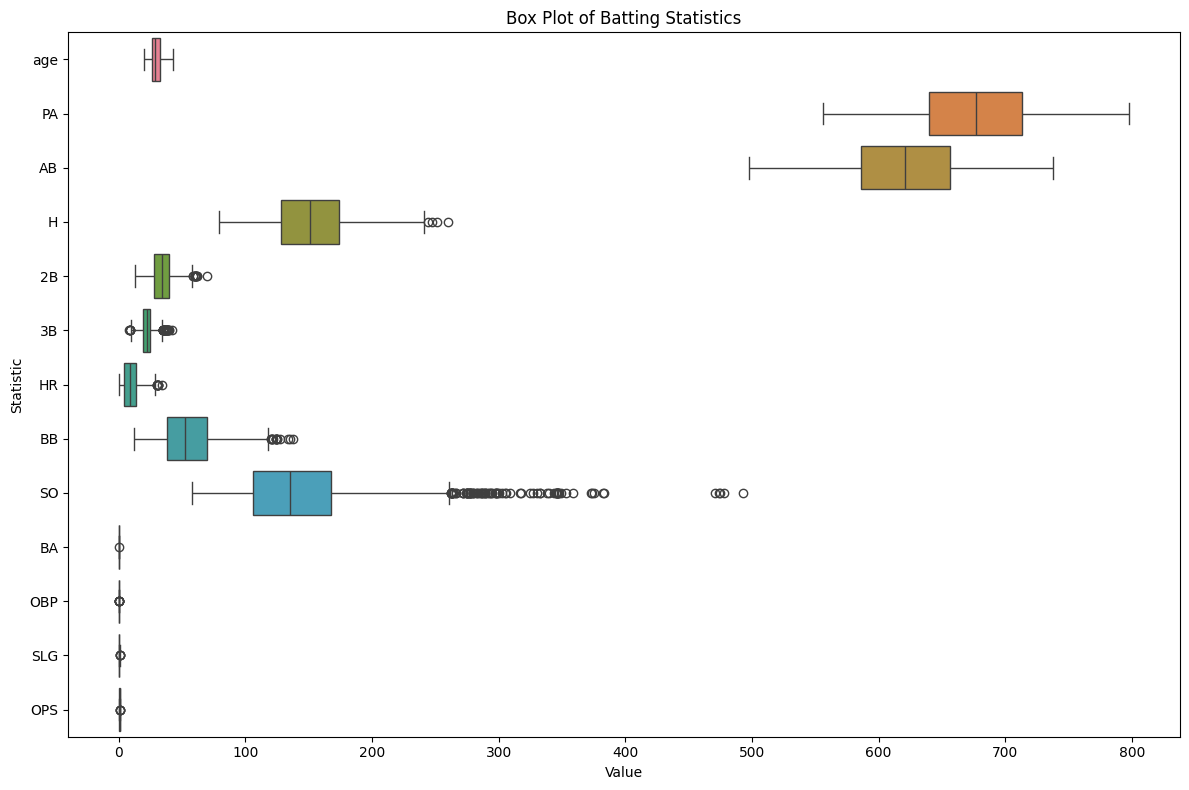

In [131]:
# Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=relevant_data, orient="h")
plt.title("Box Plot of Batting Statistics")
plt.xlabel("Value")
plt.ylabel("Statistic")
plt.tight_layout()
plt.show()

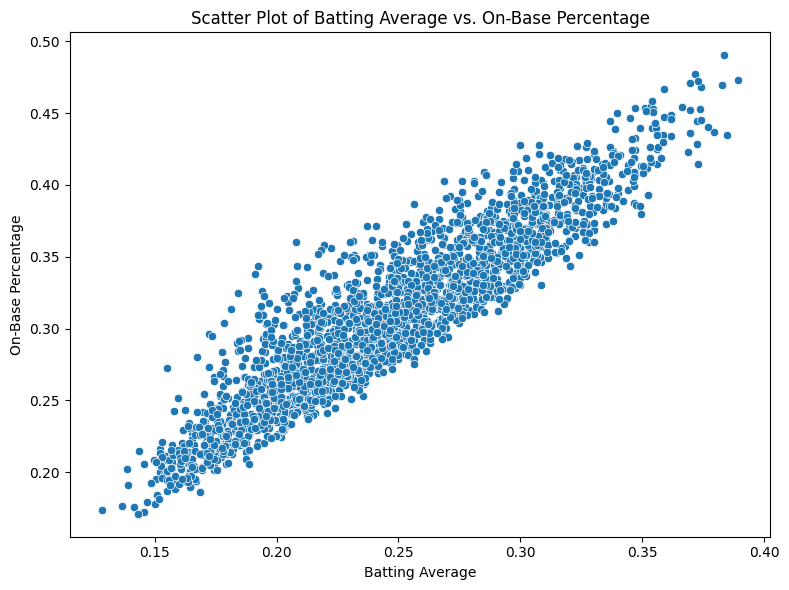

In [132]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="BA", y="OBP", data=relevant_data)
plt.title("Scatter Plot of Batting Average vs. On-Base Percentage")
plt.xlabel("Batting Average")
plt.ylabel("On-Base Percentage")
plt.tight_layout()
plt.show()

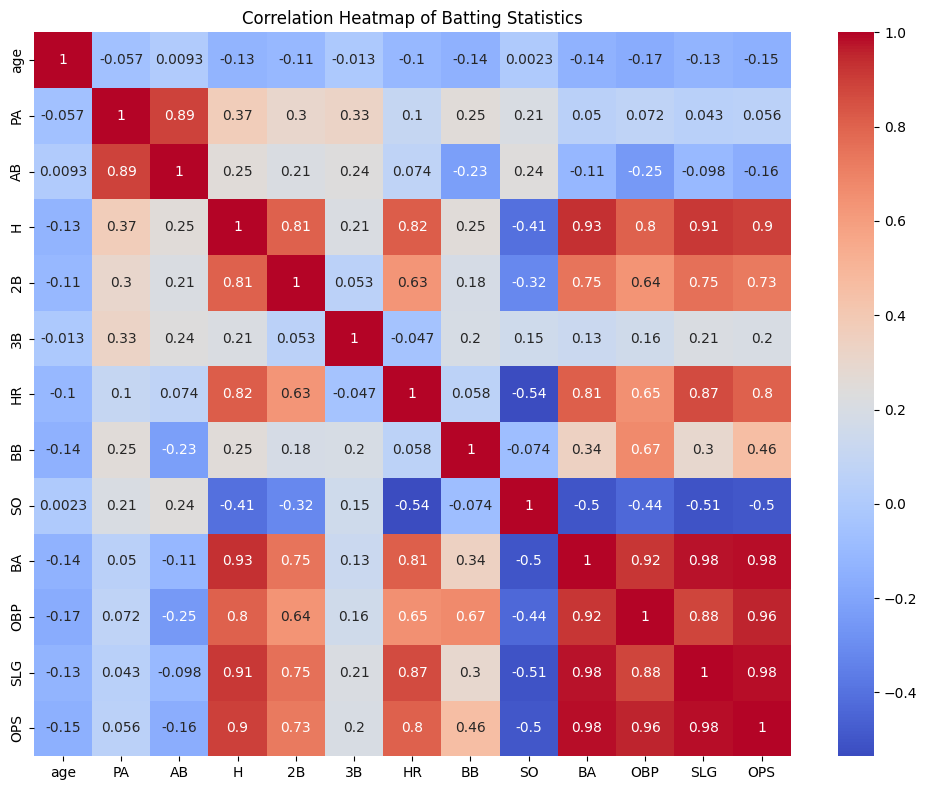

In [133]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(relevant_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Batting Statistics")
plt.tight_layout()
plt.show()

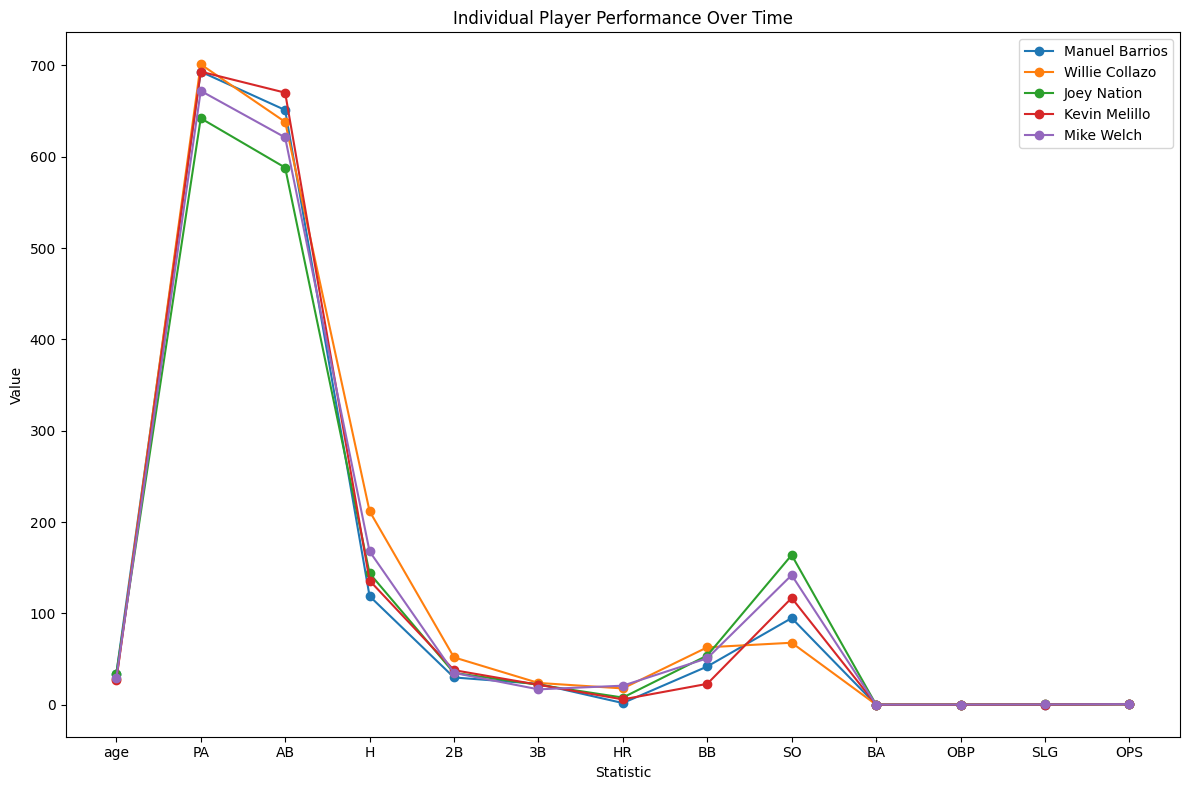

In [134]:
# Line Chart
plt.figure(figsize=(12, 8))
for index, row in data.sample(5).iterrows():
    plt.plot(
        columns_of_interest, row[columns_of_interest], marker="o", label=row["Name"]
    )
plt.title("Individual Player Performance Over Time")
plt.xlabel("Statistic")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

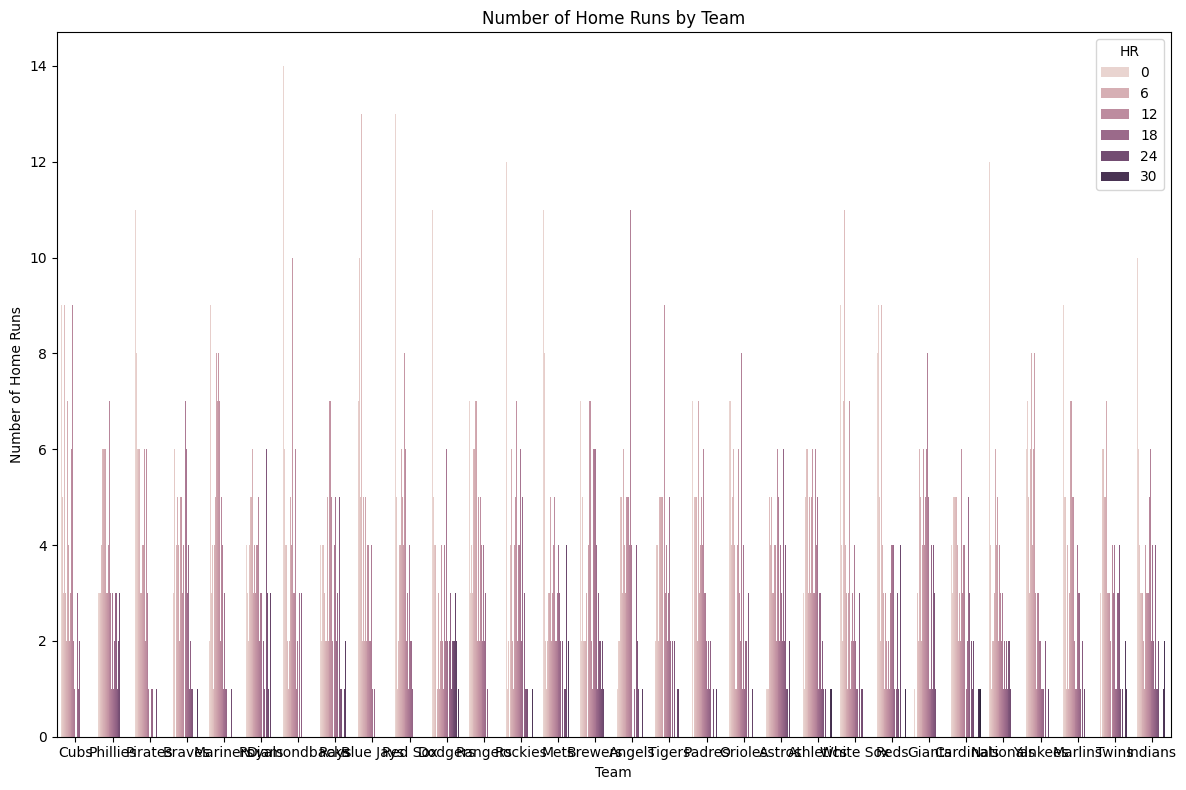

In [135]:
# Stacked Bar Chart
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x="team", hue="HR")
plt.title("Number of Home Runs by Team")
plt.xlabel("Team")
plt.ylabel("Number of Home Runs")
plt.tight_layout()
plt.show()

### Plotting Game Logs

In [136]:
game_log_data = pd.read_csv("data/game_logs_2014_2023.csv")

In [137]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(game_log_data.head())

First few rows of the dataset:
   day home_team away_team  inning top/bottom  play  home_score  away_score  \
0    1    Royals    Braves       1        Top  foul           0           0   
1    1    Royals    Braves       1        Top  ball           0           0   
2    1    Royals    Braves       1        Top  ball           0           0   
3    1    Royals    Braves       1        Top  foul           0           0   
4    1    Royals    Braves       1        Top  miss           0           0   

   swings  strikes  balls  outs  PO     pitcher         batter  base 1  \
0       0        0      0     0   0  Rob Sasser  Red Patterson       0   
1       0        1      0     0   0  Rob Sasser  Red Patterson       0   
2       0        1      1     0   0  Rob Sasser  Red Patterson       0   
3       0        1      2     0   0  Rob Sasser  Red Patterson       0   
4       0        2      2     0   0  Rob Sasser  Red Patterson       0   

   base 2  base 3  Year  
0       0       0  2014

In [138]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(game_log_data.describe())


Summary statistics of numerical columns:
                day        inning    home_score    away_score     swings  \
count  6.113084e+06  6.113084e+06  6.113084e+06  6.113084e+06  6113084.0   
mean   8.155559e+01  5.124847e+00  1.287065e+00  1.510146e+00        0.0   
std    4.676367e+01  2.836840e+00  1.810829e+00  1.960807e+00        0.0   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00        0.0   
25%    4.100000e+01  3.000000e+00  0.000000e+00  0.000000e+00        0.0   
50%    8.200000e+01  5.000000e+00  1.000000e+00  1.000000e+00        0.0   
75%    1.220000e+02  7.000000e+00  2.000000e+00  2.000000e+00        0.0   
max    1.620000e+02  3.300000e+01  2.500000e+01  1.900000e+01        0.0   

            strikes         balls          outs            PO        base 1  \
count  6.113084e+06  6.113084e+06  6.113084e+06  6.113084e+06  6.113084e+06   
mean   8.201968e-01  7.682208e-01  9.941826e-01  8.805539e-03  3.161319e-01   
std    8.233192e-01  9.404041e-01  8

In [139]:
# Distribution of plays during games
plt.figure(figsize=(12, 6))
sns.countplot(data=game_log_data, x="play")
plt.title("Distribution of Plays During Games")
plt.xlabel("Play")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

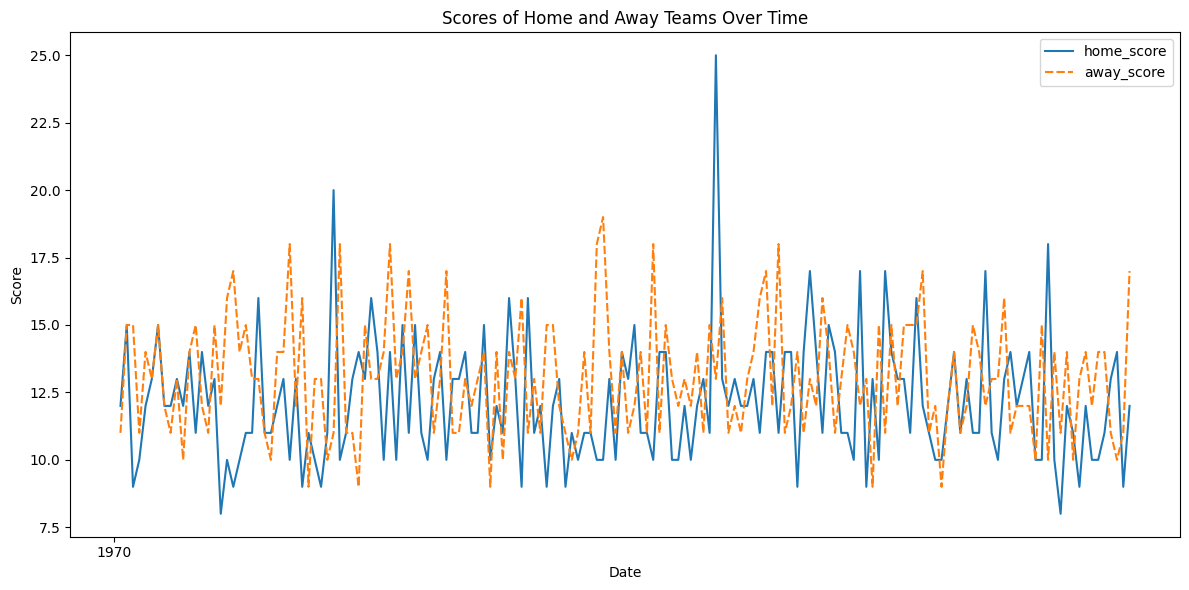

In [ ]:
# Scores and outcomes of games over time
# Since it's play-by-play data, we may need to aggregate scores by day
game_log_data["day"] = pd.to_datetime(game_log_data["day"])
daily_scores = game_log_data.groupby("day").agg(
    {"home_score": "max", "away_score": "max"}
)
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_scores)
plt.title("Scores of Home and Away Teams Over Time")
plt.xlabel("Date")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

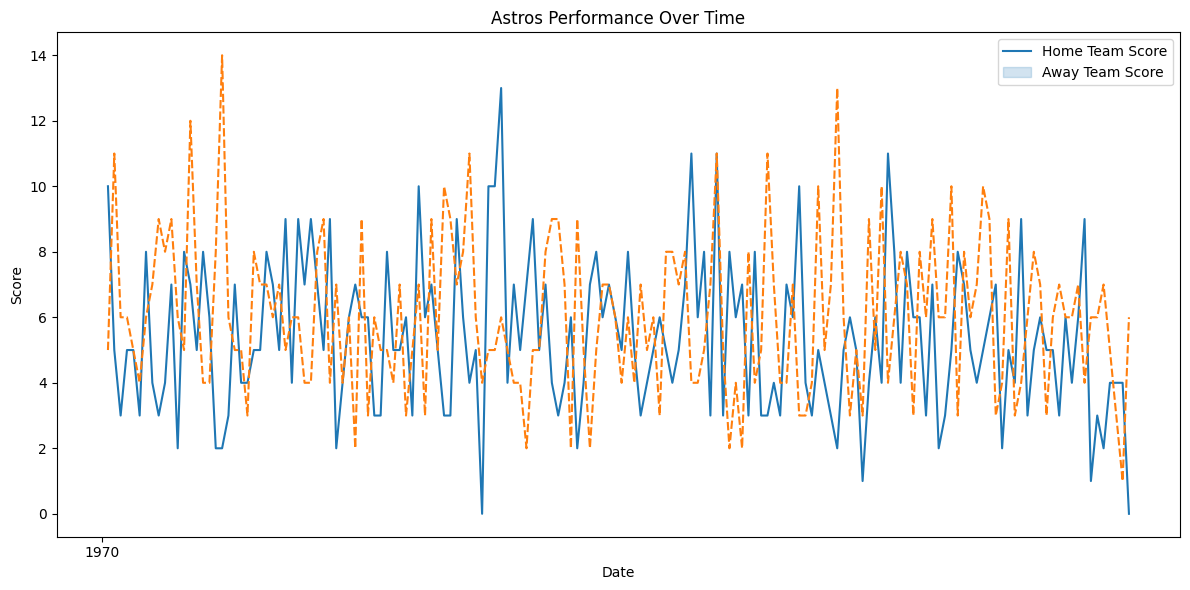

In [ ]:
# Performance of specific teams, pitchers, or batters
# For example, let's analyze the performance of the New York Yankees (NYA)
nya_home_scores = (
    game_log_data[game_log_data["home_team"] == "Astros"]
    .groupby("day")["home_score"]
    .max()
)
nya_away_scores = (
    game_log_data[game_log_data["away_team"] == "Astros"]
    .groupby("day")["away_score"]
    .max()
)
nya_scores = pd.concat([nya_home_scores, nya_away_scores], axis=1)
nya_scores.columns = ["Home Team Score", "Away Team Score"]
plt.figure(figsize=(12, 6))
sns.lineplot(data=nya_scores)
plt.title("Astros Performance Over Time")
plt.xlabel("Date")
plt.ylabel("Score")
plt.legend(["Home Team Score", "Away Team Score"])
plt.tight_layout()
plt.show()